In [65]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [66]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 04C1-9923

 Directory of C:\Users\Admin\OneDrive\Desktop\MLPROJECT\archive

02/08/2023  05:18 PM    <DIR>          .
02/08/2023  05:18 PM    <DIR>          ..
02/08/2023  05:18 PM           938,020 Bengaluru_House_Data.csv
               1 File(s)        938,020 bytes
               2 Dir(s)  77,343,485,952 bytes free


In [67]:
cd C:\Users\Admin\OneDrive\Desktop\MLPROJECT\archive

C:\Users\Admin\OneDrive\Desktop\MLPROJECT\archive


In [68]:
df1=pd.read_csv("Bengaluru_House_Data.csv")

In [69]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [70]:
df1.shape

(13320, 9)

In [71]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

## Droping [area_type,society,availability] columns considering they are not soo importatnt

In [72]:
df2=df1.drop(['area_type','availability','society'],axis='columns')
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


### Checking for NAN values and replacing the NAN values with median() if there is more NAN values , If there is a less NAN vaues we can drop the row 

In [73]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [74]:
df2['balcony'].isnull().sum()

609

In [77]:
df2['balcony'].median() ##considered median bcz if suppose there is outliers 

2.0

In [75]:
df2['balcony']=df2['balcony'].fillna(df2['balcony'].median())

In [76]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [78]:
df2['bath'].median()

2.0

In [79]:
df2['bath']=df2['bath'].fillna(df2['bath'].median())

In [80]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
balcony        0
price          0
dtype: int64

### we will drop location and size since there are less NAN values 

In [81]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [83]:
df3.shape

(13303, 6)

In [84]:
df3.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [85]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [89]:
df3['bhk']=df3['size'].apply(lambda x:int(x.split(' ')[0]))##created new colummn store integer value

C:\Users\Admin\AppData\Local\Temp/ipykernel_19056/4200255786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x:int(x.split(' ')[0]))


In [90]:
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [91]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [96]:
df3[df3.bhk>15] 

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
3379,1Hanuman Nagar,19 BHK,2000,16.0,2.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,2.0,550.0,16
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43
11559,1Kasavanhalli,18 Bedroom,1200,18.0,2.0,200.0,18


In [97]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [98]:
## we can se some values in some range so we have to get average of them

In [99]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [102]:
df3[~df3['total_sqft'].apply(is_float)].head(20)

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,2.0,2.0,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2


In [104]:
## since there are some values in terms of meter and other i am going to ignore them and for others we can take average

In [105]:
def convert_sqrt_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [106]:
convert_sqrt_to_num('21')#coverts to int

21.0

In [107]:
convert_sqrt_to_num('4400 - 6640')#average will be returned

5520.0

In [108]:
convert_sqrt_to_num('1000Sq. Meter')#here None is returned

In [109]:
df4=df3.copy()

In [110]:
df4['total_sqft']=df4['total_sqft'].apply(convert_sqrt_to_num)
df4.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [112]:
df5=df4.copy()

In [114]:
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [118]:
len(df5.location.unique())

1304

In [120]:
df5.location=df5.location.apply(lambda x:x.strip())
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               540
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [121]:
len(location_stats[location_stats<=10])

1052

In [122]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [124]:
## we can say this above location as others

In [125]:
df5.location=df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [126]:
len(df5.location.unique())

242

In [128]:
df5.head(10)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,2.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,2.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,2.0,370.00,6,36274.509804


In [129]:
## lets consider a ideal sqft value for a bhk as 300

In [131]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,2.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,2.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000


In [132]:
## we can remove all this data's

In [134]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12559, 8)

In [135]:
df6.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [137]:
def remove_pps_outliers(df):
        df_out=pd.DataFrame()
        for ket,subdf in df.groupby('location'):
            m= np.mean(subdf.price_per_sqft)
            st=np.std(subdf.price_per_sqft)
            reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
            df_out=pd.concat([df_out,reduced_df],ignore_index=True)
        return df_out
df7=remove_pps_outliers(df6)
df7.shape

(10286, 8)

In [138]:
## we should also remove properties where for same location ,the price of 3 bhk is less than 2bhk

In [139]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
        }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [142]:
df8=remove_bhk_outliers(df7)
df8.shape

(7353, 8)

In [143]:
df8[df8.bath>10]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
5306,Neeladri Nagar,10 BHK,4000.0,12.0,2.0,160.0,10,4000.000000
8530,other,10 BHK,12000.0,12.0,2.0,525.0,10,4375.000000
8619,other,16 BHK,10000.0,16.0,2.0,550.0,16,5500.000000
9352,other,11 BHK,6000.0,12.0,2.0,150.0,11,2500.000000
9683,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

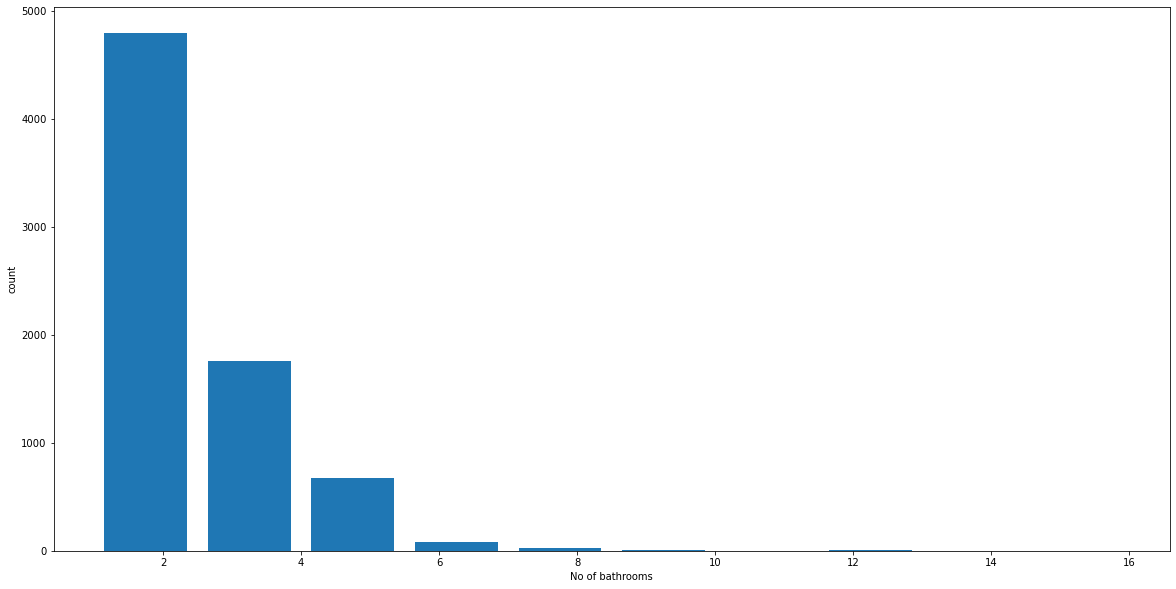

In [144]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("No of bathrooms")
plt.ylabel("count")

In [145]:
##we can remove the bathrooms which are greater than no of bedrooms with considering 2 extra bathroomns

In [146]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1634,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
5267,Nagasandra,4 Bedroom,7000.0,8.0,2.0,450.0,4,6428.571429
6748,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8455,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [147]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(7275, 8)

In [148]:
## since size and price_per_sqft is not required we can remove them

In [149]:
df10=df9.drop(["size","price_per_sqft"],axis="columns")
df10.head()

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


In [150]:
## we have to convert location into numeric , we can do that with pandas dummies

In [153]:
dummies=pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
df11=pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head(3)

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
df12=df11.drop('location',axis="columns")
df12.head()

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
df12.shape

(7275, 246)

In [159]:
X=df12.drop('price',axis='columns')
X.head()

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
y=df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [161]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [162]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8682015441884889

In [193]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.80693912, 0.7720927 , 0.86462327, 0.83536095, 0.81809933])

In [195]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(X,y):
    algos ={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[2,1],
                'selection':['cyclic','random']
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
        
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])  
find_best_model(X,y)

,model,best_score,best_params
0,linear_regression,0.819423,{'normalize': True}
1,decision_tree,0.720987,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
2,lasso,0.679910,"{'alpha': 1, 'selection': 'cyclic'}"


In [196]:
## WE CAN SAY LINEAR REGRESSION IS GIVING GOOD RESULTS SO WE CHOOSE THAT

In [198]:
X.head(1)

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [199]:
def predict_price(location,sqft,bath,bhk,balcony):
    loc_index=np.where(X.columns==location)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    x[3]=balcony
    if loc_index>=0:
        x[loc_index]=1
    return lr.predict([x])[0]

In [207]:
predict_price('1st Phase JP Nagar',1000,2,2,0)

95.11066995024994

In [212]:
predict_price('1st Phase JP Nagar',1000,3,3,0)

98.77922352662469

In [213]:
import pickle
with open ('bengaluru_home_price.pickle','wb') as f:
    pickle.dump(lr,f)

In [214]:
import json
columns = {
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))